<a href="https://colab.research.google.com/github/sagar-rathod/PytorchDeepML/blob/master/examples/Image_Classification_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install [deepml](https://github.com/sagar-rathod/PytorchDeepML) libarary.

In [ ]:
!pip install deepml

In [1]:
import torch
import torchvision
from torchvision import transforms

import numpy as np
from matplotlib import pyplot as plt

import matplotlib as mpl
import deepml
# Uncomment following line if your notebook theme is black
mpl.rcParams['text.color'] = "white"

In [2]:
deepml.__version__

'1.1.0-dev'

In [3]:
train_transforms = transforms.Compose([ transforms.RandomVerticalFlip(),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()])
val_transforms = transforms.ToTensor()

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', download=True, transform=val_transforms)

testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
classes = ('plane', 'car', 'bir|d', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

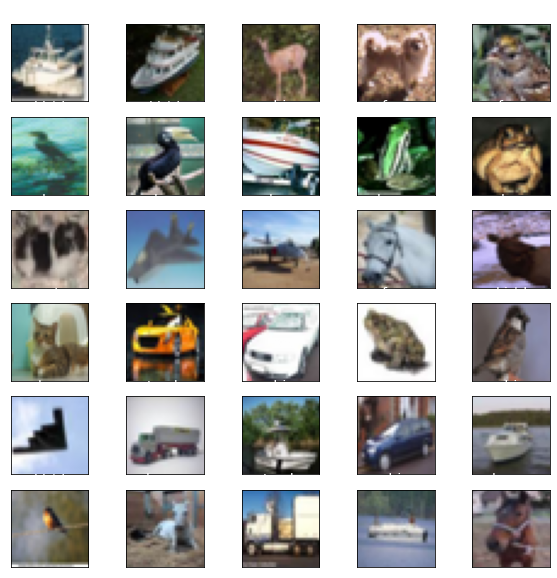

In [6]:
from deepml.utils import show_images_from_loader
show_images_from_loader(testloader, samples=30, cols=5, classes=classes, figsize=(10, 10))

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

In [8]:
from deepml.predict import ImageClassification
from deepml.train import Learner
from torch.nn import CrossEntropyLoss

In [ ]:
image_classification = ImageClassification(model, 'net', classes=classes)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()

learner = Learner(image_classification, optimizer, criterion)

In [10]:
# Enable Tensorboard on colab
%load_ext tensorboard

# Run tensorboard and provide model working directory
%tensorboard --logdir 'net'

Reusing TensorBoard on port 6006 (pid 27344), started 4:08:58 ago. (Use '!kill 27344' to kill it.)

In [11]:
from deepml.metrics.classification import Accuracy, FScore, MCC

metrics = [('acc', Accuracy()), ('fscore', FScore()), ('mcc', MCC())]

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)

learner.fit(train_loader=trainloader, val_loader=testloader, epochs=2, metrics=metrics,
           lr_scheduler=lr_scheduler)

Epoch 13/14:


Saving best validation model.
Epoch 14/14:


Saving best validation model.


In [12]:
learner.fit(train_loader=trainloader, val_loader=testloader, epochs=10, metrics=metrics,
           lr_scheduler=lr_scheduler)

Epoch 3/12:


Saving best validation model.
Epoch 4/12:


Saving best validation model.
Epoch 5/12:


Saving best validation model.
Epoch 6/12:


Saving best validation model.
Epoch 7/12:


Saving best validation model.
Epoch 8/12:


Epoch 9/12:


Saving best validation model.
Epoch 10/12:


Saving best validation model.
Epoch 11/12:


Saving best validation model.
Epoch 12/12:


Saving best validation model.


In [16]:
predictions, targets = learner.predict(testloader)

In [19]:
predicted_class, probs, targets = learner.predict_class(testloader)

In [23]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(targets, predicted_class))

Accuracy: 0.4038


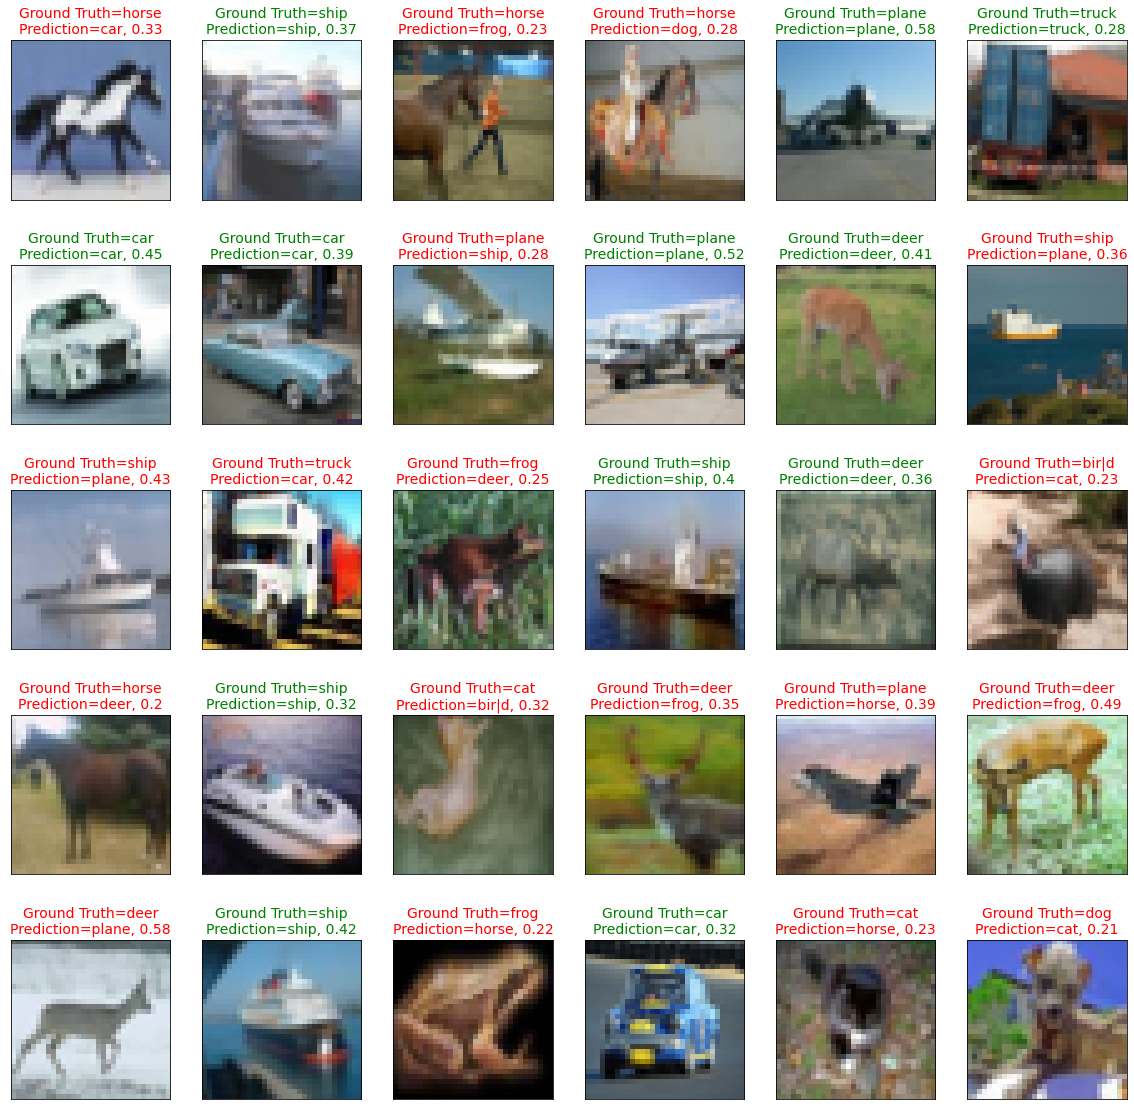

In [12]:
learner.show_predictions(testloader, samples=30, cols=6, figsize=(20, 20))